# Bibliotecas

In [73]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.tree import plot_tree

import shap

# Dataset

In [2]:
#Carregar o dataset Titanic
df_train = pd.read_csv(r'C:\Python\Titanic\train.csv')

In [3]:
# Exibir as 5 primeiras linhas do dataset
print(df_train.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


In [4]:
# Exibir informações gerais sobre o DataFrame
print(df_train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


In [5]:
# Exibir estatísticas descritivas para as colunas numéricas
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
# Contar valores ausentes por coluna
print(df_train.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [7]:
# Quantidade de sobreviventes
print("Quantidade de sobreviventes:", df_train['Survived'].value_counts(normalize=True))


Quantidade de sobreviventes: Survived
0    0.616162
1    0.383838
Name: proportion, dtype: float64


In [8]:
# Exibir a quantidade de valores ausentes por coluna
df_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

# Tratamento dos Dados

In [9]:
# Excluir a coluna 'Cabin'
df_train.drop('Cabin', axis=1, inplace=True)

# Exibir a novo dataset
print(df_train.head())
print(df_train.info())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Embarked  
0      0         A/5 21171   7.2500        S  
1      0          PC 17599  71.2833        C  
2      0  STON/O2. 3101282   7.9250        S  
3      0            113803  53.1000        S  
4      0            373450   8.0500        S  
<class 'pandas.core.frame.DataFrame'>


In [10]:
# Resolvendo o problema de valores ausentes na coluna 'Embarked'
# 1. Calcular a moda da coluna 'Embarked'
moda_embarked = df_train['Embarked'].mode()[0] # [0] para pegar o primeiro valor se houver múltiplas modas
print(f"A moda da coluna 'Embarked' é: {moda_embarked}")

# 2. Preencher os valores ausentes (NaNs) na coluna 'Embarked' com a moda calculada
df_train['Embarked'].fillna(moda_embarked, inplace=True)

# 3. Verificar se os valores ausentes foram preenchidos (boa prática)
print("\nContagem de valores ausentes após preencher 'Embarked':")
print(df_train.isnull().sum())

A moda da coluna 'Embarked' é: S

Contagem de valores ausentes após preencher 'Embarked':
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         0
dtype: int64


C:\Users\NVME\AppData\Local\Temp\ipykernel_8948\2126310383.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_train['Embarked'].fillna(moda_embarked, inplace=True)


In [11]:
# 4. Agora sim, calcular a média da coluna 'Age'
media_idade = df_train['Age'].mean()
print(f"A média da coluna 'Age' é: {media_idade:.2f}")

# 5. Calcular a mediana da coluna 'Age'
mediana_idade = df_train['Age'].median()
print(f"A mediana da coluna 'Age' é: {mediana_idade:.2f}")


A média da coluna 'Age' é: 29.70
A mediana da coluna 'Age' é: 28.00


In [12]:
# Resolvendo o problema de valores ausentes na coluna 'Age'
# 1. Preencher os valores ausentes (NaNs) na coluna 'Age' com a moda calculada
df_train['Age'].fillna(mediana_idade, inplace=True)

# 2. Verificar se os valores ausentes foram preenchidos (boa prática)
print("\nContagem de valores ausentes após preencher 'Age':")
print(df_train.isnull().sum())


Contagem de valores ausentes após preencher 'Age':
PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


C:\Users\NVME\AppData\Local\Temp\ipykernel_8948\3576810113.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_train['Age'].fillna(mediana_idade, inplace=True)


# Insights

## Insight Sobre a Relação entre Sexo e Sobreviventes

In [13]:
# Calcular a contagem de sobreviventes e não-sobreviventes para cada sexo
print("Contagem de sobreviventes (1) e não-sobreviventes (0) por Sexo:")
print(df_train.groupby('Sex')['Survived'].value_counts())

Contagem de sobreviventes (1) e não-sobreviventes (0) por Sexo:
Sex     Survived
female  1           233
        0            81
male    0           468
        1           109
Name: count, dtype: int64


In [14]:
# Para ter uma visão mais completa, vamos também calcular a proporção
print("\nProporção de sobreviventes (1) e não-sobreviventes (0) por Sexo:")
print(df_train.groupby('Sex')['Survived'].value_counts(normalize=True))


Proporção de sobreviventes (1) e não-sobreviventes (0) por Sexo:
Sex     Survived
female  1           0.742038
        0           0.257962
male    0           0.811092
        1           0.188908
Name: proportion, dtype: float64


In [15]:
# Vamos calcular a proporção de mulheres e homens DENTRO do grupo de sobreviventes

# Filtrar o DataFrame para incluir apenas os sobreviventes
survivors_df = df_train[df_train['Survived'] == 1]

# Calcular a proporção de sexo dentro do grupo de sobreviventes
print("Proporção de Mulheres e Homens entre os Sobreviventes:")
print(survivors_df['Sex'].value_counts(normalize=True))

Proporção de Mulheres e Homens entre os Sobreviventes:
Sex
female    0.681287
male      0.318713
Name: proportion, dtype: float64


In [16]:
# Vamos calcular a proporção de mulheres e homens DENTRO do grupo de não-sobreviventes

# Filtrar o DataFrame para incluir apenas os não-sobreviventes
survivors_df = df_train[df_train['Survived'] == 0]

# Calcular a proporção de sexo dentro do grupo de não-sobreviventes
print("Proporção de Mulheres e Homens entre os não-Sobreviventes:")
print(survivors_df['Sex'].value_counts(normalize=True))

Proporção de Mulheres e Homens entre os não-Sobreviventes:
Sex
male      0.852459
female    0.147541
Name: proportion, dtype: float64


## Insight Sobre a Relação entre Classe e Sobreviventes

In [17]:
# Calcular a contagem de sobreviventes e não-sobreviventes para cada classe
print("Contagem de sobreviventes (1) e não-sobreviventes (0) por Classe:")
print(df_train.groupby('Pclass')['Survived'].value_counts())

Contagem de sobreviventes (1) e não-sobreviventes (0) por Classe:
Pclass  Survived
1       1           136
        0            80
2       0            97
        1            87
3       0           372
        1           119
Name: count, dtype: int64


In [18]:
# Para ter uma visão mais completa, vamos também calcular a proporção
print("\nProporção de sobreviventes (1) e não-sobreviventes (0) por Classe:")
print(df_train.groupby('Pclass')['Survived'].value_counts(normalize=True))


Proporção de sobreviventes (1) e não-sobreviventes (0) por Classe:
Pclass  Survived
1       1           0.629630
        0           0.370370
2       0           0.527174
        1           0.472826
3       0           0.757637
        1           0.242363
Name: proportion, dtype: float64


In [19]:
# Vamos calcular a proporção das 3 classes DENTRO do grupo de sobreviventes

# Filtrar o DataFrame para incluir apenas os sobreviventes
survivors_df = df_train[df_train['Survived'] == 1]

# Calcular a proporção de classe dentro do grupo de sobreviventes
print("Proporção das 3 classes entre os Sobreviventes:")
print(survivors_df['Pclass'].value_counts(normalize=True))

Proporção das 3 classes entre os Sobreviventes:
Pclass
1    0.397661
3    0.347953
2    0.254386
Name: proportion, dtype: float64


In [20]:
# Vamos calcular a proporção das 3 classes DENTRO do grupo de não-sobreviventes

# Filtrar o DataFrame para incluir apenas os não-sobreviventes
survivors_df = df_train[df_train['Survived'] == 0]

# Calcular a proporção de classe dentro do grupo de não-sobreviventes
print("Proporção das 3 classes entre os não-Sobreviventes:")
print(survivors_df['Pclass'].value_counts(normalize=True))

Proporção das 3 classes entre os não-Sobreviventes:
Pclass
3    0.677596
2    0.176685
1    0.145719
Name: proportion, dtype: float64


## Insight Sobre a Relação entre Idade e Sobreviventes

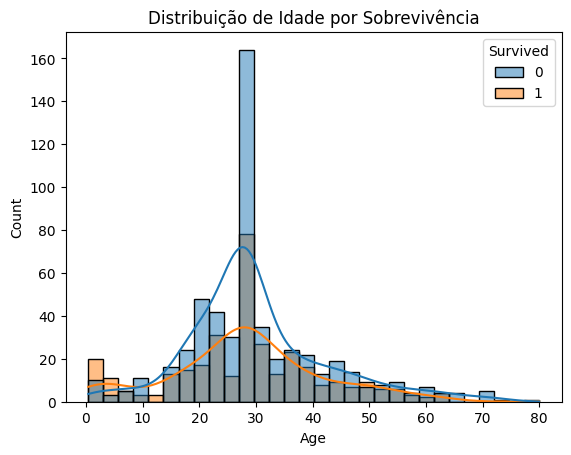

In [21]:
sns.histplot(data=df_train, x='Age', hue='Survived', kde=True)
plt.title('Distribuição de Idade por Sobrevivência')
plt.show()

## Insight Sobre a Relação entre Tarifa e Sobreviventes

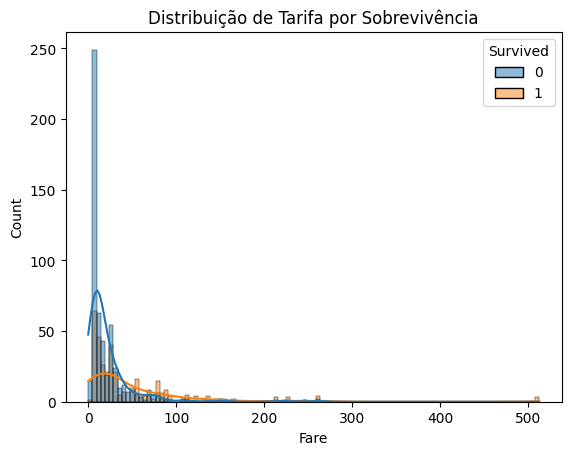

In [22]:
sns.histplot(data=df_train, x='Fare', hue='Survived', kde=True)
plt.title('Distribuição de Tarifa por Sobrevivência')
plt.show()

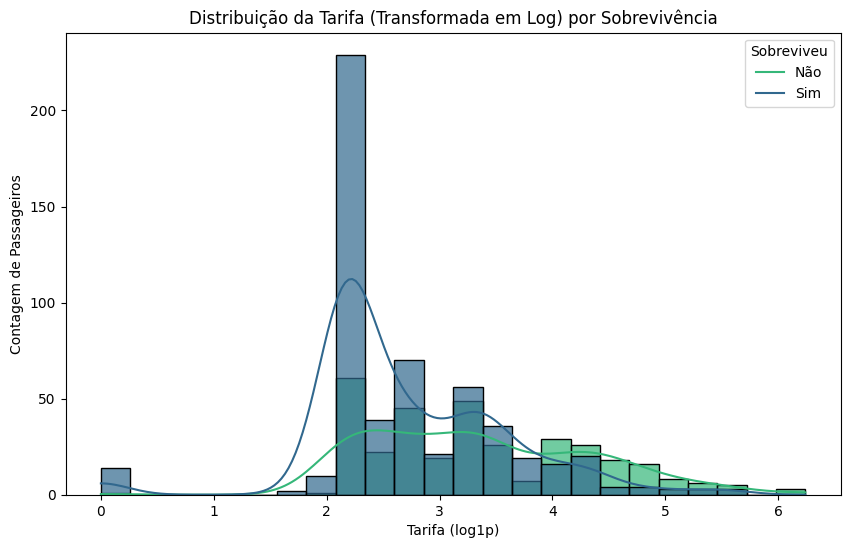

In [23]:
# Aplicar a transformação logarítmica à coluna 'Fare'
# Criaremos uma nova coluna para armazenar a tarifa transformada, para manter a original.
df_train['Fare_log'] = np.log1p(df_train['Fare'])

# Gerar o histograma/KDE da nova coluna 'Fare_log' vs. 'Survived'
plt.figure(figsize=(10, 6))
sns.histplot(data=df_train, x='Fare_log', hue='Survived', kde=True, palette='viridis', alpha=0.7)
plt.title('Distribuição da Tarifa (Transformada em Log) por Sobrevivência')
plt.xlabel('Tarifa (log1p)')
plt.ylabel('Contagem de Passageiros')
plt.legend(title='Sobreviveu', labels=['Não', 'Sim'])
plt.show()

## Insight Sobre a Relação entre tamanho da familia e Sobreviventes

In [24]:
# Criando a coluna 'FamilySize'
df_train['FamilySize'] = df_train['SibSp'] + df_train["Parch"] + 1

In [25]:
# Calcular a contagem de sobreviventes e não-sobreviventes para cada tamanho de família
print("Contagem de sobreviventes (1) e não-sobreviventes (0) por tamanho de família:")
print(df_train.groupby('FamilySize')['Survived'].value_counts())

Contagem de sobreviventes (1) e não-sobreviventes (0) por tamanho de família:
FamilySize  Survived
1           0           374
            1           163
2           1            89
            0            72
3           1            59
            0            43
4           1            21
            0             8
5           0            12
            1             3
6           0            19
            1             3
7           0             8
            1             4
8           0             6
11          0             7
Name: count, dtype: int64


In [26]:
# Para ter uma visão mais completa, vamos também calcular a proporção
print("\nProporção de sobreviventes (1) e não-sobreviventes (0) por tamanho de família:")
print(df_train.groupby('FamilySize')['Survived'].value_counts(normalize=True))


Proporção de sobreviventes (1) e não-sobreviventes (0) por tamanho de família:
FamilySize  Survived
1           0           0.696462
            1           0.303538
2           1           0.552795
            0           0.447205
3           1           0.578431
            0           0.421569
4           1           0.724138
            0           0.275862
5           0           0.800000
            1           0.200000
6           0           0.863636
            1           0.136364
7           0           0.666667
            1           0.333333
8           0           1.000000
11          0           1.000000
Name: proportion, dtype: float64


In [27]:
# Vamos calcular a proporção de tamanho de família DENTRO do grupo de sobreviventes

# Filtrar o DataFrame para incluir apenas os sobreviventes
survivors_df = df_train[df_train['Survived'] == 1]

# Calcular a proporção de tamanho de família dentro do grupo de sobreviventes
print("Proporção de tamanho de família entre os Sobreviventes:")
print(survivors_df['FamilySize'].value_counts(normalize=True))

Proporção de tamanho de família entre os Sobreviventes:
FamilySize
1    0.476608
2    0.260234
3    0.172515
4    0.061404
7    0.011696
6    0.008772
5    0.008772
Name: proportion, dtype: float64


In [28]:
# Vamos calcular a proporção de tamanho de família DENTRO do grupo de não-sobreviventes

# Filtrar o DataFrame para incluir apenas os não-sobreviventes
survivors_df = df_train[df_train['Survived'] == 0]

# Calcular a proporção de tamanho de família dentro do grupo de não-sobreviventes
print("Proporção de tamanho de família entre os não-Sobreviventes:")
print(survivors_df['FamilySize'].value_counts(normalize=True))

Proporção de tamanho de família entre os não-Sobreviventes:
FamilySize
1     0.681239
2     0.131148
3     0.078324
6     0.034608
5     0.021858
7     0.014572
4     0.014572
11    0.012750
8     0.010929
Name: proportion, dtype: float64


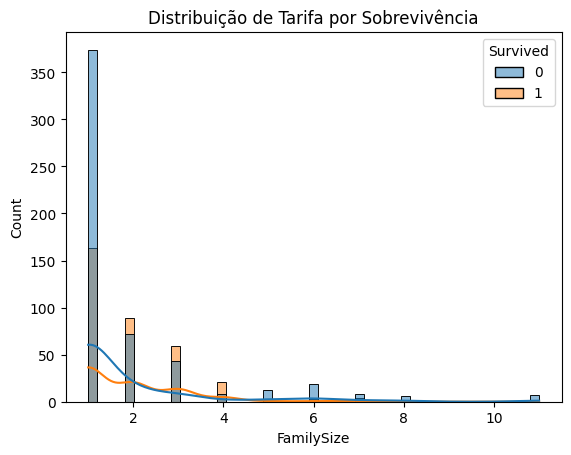

In [29]:
# Gerar o histograma/KDE da coluna 'FamilySize' vs. 'Survived'
sns.histplot(data=df_train, x='FamilySize', hue='Survived', kde=True)
plt.title('Distribuição de Tarifa por Sobrevivência')
plt.show()

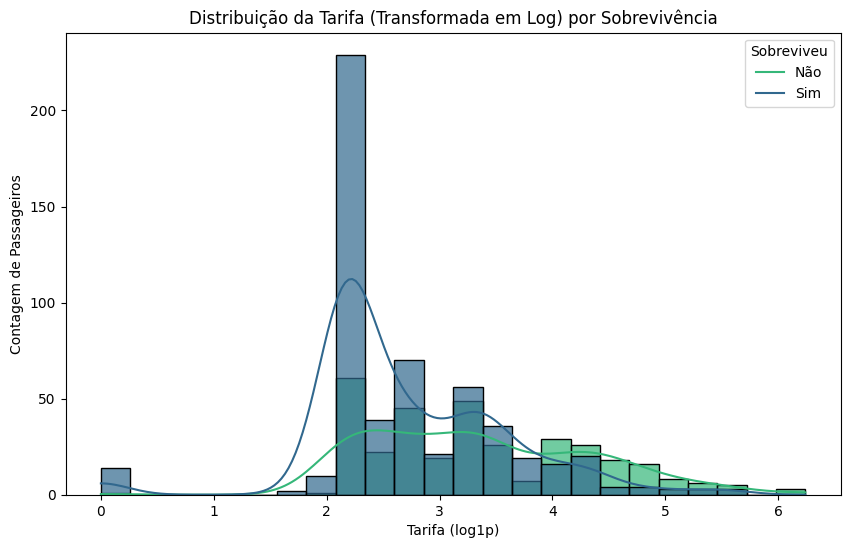

In [30]:
# Aplicar a transformação logarítmica à coluna 'FamilySize'
# Criaremos uma nova coluna para armazenar a tarifa transformada, para manter a original.
df_train['FamilySize_log'] = np.log1p(df_train['FamilySize'])

# Gerar o histograma/KDE da nova coluna 'FamilySize_log' vs. 'Survived'
plt.figure(figsize=(10, 6))
sns.histplot(data=df_train, x='Fare_log', hue='Survived', kde=True, palette='viridis', alpha=0.7)
plt.title('Distribuição da Tarifa (Transformada em Log) por Sobrevivência')
plt.xlabel('Tarifa (log1p)')
plt.ylabel('Contagem de Passageiros')
plt.legend(title='Sobreviveu', labels=['Não', 'Sim'])
plt.show()

# Preparar Os Dados Para Modelagem

In [31]:
# Aplicar One-Hot Encoding na coluna "Sex"
df_train_encoded = pd.get_dummies(
    df_train, 
    prefix=None, 
    prefix_sep='_', 
    dummy_na=False, 
    columns=['Sex'], 
    sparse=False, 
    drop_first=False, 
    dtype=None)

In [32]:
# Aplicar One-Hot Encoding na coluna "Embarked"
df_train_encoded = pd.get_dummies(
    df_train_encoded, 
    prefix=None, 
    prefix_sep='_', 
    dummy_na=False, 
    columns=['Embarked'], 
    sparse=False, 
    drop_first=False, 
    dtype=None)

In [33]:
df_train_encoded.drop('PassengerId', axis=1, inplace=True)
df_train_encoded.drop('Name', axis=1, inplace=True)
df_train_encoded.drop('SibSp', axis=1, inplace=True)
df_train_encoded.drop('Parch', axis=1, inplace=True)
df_train_encoded.drop('Ticket', axis=1, inplace=True)
df_train_encoded.drop('Fare', axis=1, inplace=True)
df_train_encoded.drop('FamilySize_log', axis=1, inplace=True)

In [34]:
# Exibir as 5 primeiras linhas do dataset modelado
print(df_train_encoded.head())

   Survived  Pclass   Age  Fare_log  FamilySize  Sex_female  Sex_male  \
0         0       3  22.0  2.110213           2       False      True   
1         1       1  38.0  4.280593           2        True     False   
2         1       3  26.0  2.188856           1        True     False   
3         1       1  35.0  3.990834           2        True     False   
4         0       3  35.0  2.202765           1       False      True   

   Embarked_C  Embarked_Q  Embarked_S  
0       False       False        True  
1        True       False       False  
2       False       False        True  
3       False       False        True  
4       False       False        True  


In [35]:
# Exibir informações gerais sobre o DataFrame modelado
print(df_train_encoded.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    891 non-null    int64  
 1   Pclass      891 non-null    int64  
 2   Age         891 non-null    float64
 3   Fare_log    891 non-null    float64
 4   FamilySize  891 non-null    int64  
 5   Sex_female  891 non-null    bool   
 6   Sex_male    891 non-null    bool   
 7   Embarked_C  891 non-null    bool   
 8   Embarked_Q  891 non-null    bool   
 9   Embarked_S  891 non-null    bool   
dtypes: bool(5), float64(2), int64(3)
memory usage: 39.3 KB
None


In [36]:
# Exibir estatísticas descritivas para as colunas numéricas
df_train_encoded.describe()

,Survived,Pclass,Age,Fare_log,FamilySize
count,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.361582,2.962246,1.904602
std,0.486592,0.836071,13.019697,0.969048,1.613459
min,0.000000,1.000000,0.420000,0.000000,1.000000
25%,0.000000,2.000000,22.000000,2.187218,1.000000
50%,0.000000,3.000000,28.000000,2.737881,1.000000
75%,1.000000,3.000000,35.000000,3.465736,2.000000
max,1.000000,3.000000,80.000000,6.240917,11.000000


In [37]:
# Dividindo o dataset entre entrada (X) e saida (Y)
X = df_train_encoded.drop('Survived', axis=1)
Y = df_train_encoded['Survived']

In [38]:
# Dividir o dataset em treino e teste, sendo 20% para teste e 80% para treino, mantendo a proporção de classes
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42, stratify=Y)

In [39]:
# Identificar as colunas numéricas que precisam de escalonamento
# As colunas dummy (Sex_male, Embarked_Q, Embarked_S) já são 0 ou 1, não precisam de escalonamento.
# Pclass, embora ordinal, será escalada por simplicidade e prática comum.
Colunas_Numericas = ['Pclass', 'Age', 'Fare_log', 'FamilySize']

# 3. Inicializar o StandardScaler
scaler = StandardScaler()

# 4. Ajustar o scaler APENAS nos dados de TREINO e transformar os dados de TREINO
X_train_scaled = scaler.fit_transform(X_train[Colunas_Numericas])

# 5. Transformar os dados de TESTE usando o scaler JÁ AJUSTADO nos dados de treino
X_test_scaled = scaler.transform(X_test[Colunas_Numericas])

# 6. Converter os arrays numpy escalados de volta para DataFrames (mantendo os nomes das colunas)
X_train_scaled = pd.DataFrame(X_train_scaled, columns=Colunas_Numericas, index=X_train.index)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=Colunas_Numericas, index=X_test.index)

# 7. Combinar as colunas escaladas com as colunas não-numéricas (dummy variables)
# Primeiro, remover as colunas numéricas originais de X_train e X_test
X_train_non_scaled = X_train.drop(columns=Colunas_Numericas)
X_test_non_scaled = X_test.drop(columns=Colunas_Numericas)

# Concatenar as colunas escaladas e as não-escaladas
X_train = pd.concat([X_train_scaled, X_train_non_scaled], axis=1)
X_test = pd.concat([X_test_scaled, X_test_non_scaled], axis=1)


# Machine Learning

## Machine Learning - Regressao Logistica

In [40]:
# Iniciar o modelo de regressão logística
modelo = LogisticRegression(random_state=42, solver = 'liblinear', max_iter=1000)

# Treinar o modelo com os dados de treino
print("\nTreinando o modelo Regressao Logistica...")
modelo.fit(X_train, Y_train)
print("Modelo treinado com sucesso!")


Treinando o modelo Regressao Logistica...
Modelo treinado com sucesso!


In [41]:
# Fazer previsões no conjunto de teste
Y_pred = modelo.predict(X_test)

# Avaliar o modelo
print("\n--- Avaliação do Modelo de Regressão Logística ---")

# Acurácia
accuracy = accuracy_score(Y_test, Y_pred)
print(f"Acurácia: {accuracy:.4f}")

# Matriz de Confusão
print("\nMatriz de Confusão:")
print(confusion_matrix(Y_test, Y_pred))

# Relatório de Classificação
print("\nRelatório de Classificação:")
print(classification_report(Y_test, Y_pred))


--- Avaliação do Modelo de Regressão Logística ---
Acurácia: 0.8045

Matriz de Confusão:
[[95 15]
 [20 49]]

Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.83      0.86      0.84       110
           1       0.77      0.71      0.74        69

    accuracy                           0.80       179
   macro avg       0.80      0.79      0.79       179
weighted avg       0.80      0.80      0.80       179



### Machine Learning - Regressao Logistica - GrindSearchCV

In [42]:
# Definir os parâmetros para o GridSearchCV para Regressão Logística
parametros = {
    'C': [0.01, 0.1, 1, 10, 100], 
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga']
}

In [43]:
# Iniciar o modelo base
logreg = LogisticRegression(random_state=42)

In [44]:
# Configurar o GridSearchCV
grid_search = GridSearchCV(
    logreg,
    param_grid=parametros,
    cv=5, # cv=5 significa validação cruzada com 5 folds
    scoring='accuracy', # scoring='accuracy' indica que queremos otimizar a acurácia
    n_jobs=-1,  # Usar todos os núcleos disponíveis
    verbose=1  # Exibir progresso
)

In [45]:
# Treinar o GrindSsearchCV nos dados de treino
print("\nIniciando o GridSearchCV...")
grid_search.fit(X_train, Y_train)
print("GridSearchCV concluído!")


Iniciando o GridSearchCV...
Fitting 5 folds for each of 20 candidates, totalling 100 fits
GridSearchCV concluído!


In [46]:
# Exibir os melhores hiperparâmetros e a melhor pontuação
print("\nMelhores hiperparâmetros encontrados:", grid_search.best_params_)
print(f"Melhor acurácia da validação cruzada:, {grid_search.best_score_:.4f}")

# Obter o melhor modelo treinado
best_model = grid_search.best_estimator_


Melhores hiperparâmetros encontrados: {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}
Melhor acurácia da validação cruzada:, 0.7950


In [47]:
# Avaliar o melhor modelo no conjunto de TESTE (o que realmente importa!)
y_pred_tuned = best_model.predict(X_test)

print("\n--- Avaliação do Melhor Modelo (Otimizado) no Conjunto de TESTE ---")
accuracy_tuned = accuracy_score(Y_test, y_pred_tuned)
print(f"Acurácia (otimizada): {accuracy_tuned:.4f}")
print("\nMatriz de Confusão (otimizada):")
print(confusion_matrix(Y_test, y_pred_tuned))
print("\nRelatório de Classificação (otimizado):")
print(classification_report(Y_test, y_pred_tuned))


--- Avaliação do Melhor Modelo (Otimizado) no Conjunto de TESTE ---
Acurácia (otimizada): 0.7877

Matriz de Confusão (otimizada):
[[95 15]
 [23 46]]

Relatório de Classificação (otimizado):
              precision    recall  f1-score   support

           0       0.81      0.86      0.83       110
           1       0.75      0.67      0.71        69

    accuracy                           0.79       179
   macro avg       0.78      0.77      0.77       179
weighted avg       0.79      0.79      0.78       179



## Machine Learning - Floresta Aleatoria (Random Forest)

### Machine Learning - Floresta Aleatoria (Random Forest) - Treinando

In [48]:
# Incializar o modelo Random Forest
modelo_rf = RandomForestClassifier(
    n_estimators=100, # n_estimators: número de árvores na floresta (um bom ponto de partida é 100)
    random_state=42) # random_state: para reprodutibilidade

In [49]:
# Treinar o modelo
print("\nTreinando o modelo Random Forest...")
modelo_rf.fit(X_train, Y_train)
print("Modelo Random Forest treinado com sucesso!")


Treinando o modelo Random Forest...


Modelo Random Forest treinado com sucesso!


In [50]:
# Fazer previsões no conjunto de teste
Y_pred_rf = modelo_rf.predict(X_test)

In [51]:
# Avaliar o modelo
print("\n--- Avaliação do Modelo Random Forest ---")

# Acurácia
accuracy_rf = accuracy_score(Y_test, Y_pred_rf)
print(f"Acurácia: {accuracy_rf:.4f}")

# Matriz de Confusão
print("\nMatriz de Confusão:")
print(confusion_matrix(Y_test, Y_pred_rf))

# Relatório de Classificação
print("\nRelatório de Classificação:")
print(classification_report(Y_test, Y_pred_rf))


--- Avaliação do Modelo Random Forest ---
Acurácia: 0.7989

Matriz de Confusão:
[[95 15]
 [21 48]]

Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.82      0.86      0.84       110
           1       0.76      0.70      0.73        69

    accuracy                           0.80       179
   macro avg       0.79      0.78      0.78       179
weighted avg       0.80      0.80      0.80       179



### Machine Learning - Floresta Aleatoria (Random Forest) - GrindSearchCV

In [ ]:
# Definir os parâmetros para o GridSearchCV para Random Forest
#parametros_grid_rf = {
#    'n_estimators': [50, 100, 150, 200, 250],  # Número de árvores na floresta'
#    'criterion': ['gini', 'entropy', 'log_loss'],  # Critério de divisão
#    'max_depth': [None, 5, 10, 15, 20],  # Profundidade máxima das árvores
#    'min_samples_split': [2, 5, 10],  # Número mínimo de amostras necessárias para dividir um nó
#    'min_samples_leaf': [1, 2, 4],  # Número mínimo de amostras necessárias em um nó folha
#    'max_features': ['auto', 'sqrt', 'log2'],  # Número de recursos a serem considerados ao procurar a melhor divisão
#    'random_state': [42]  # Para reprodutibilidade
#}

# O melhor conjunto de parâmetros para o GridSearchCV para Random Forest
parametros_grid_rf = {
    'n_estimators': [50],
    'criterion': ['gini'],
    'max_depth': [None],
    'max_features': ['sqrt'],
    'min_samples_leaf': [2],
    'min_samples_split': [2],
    'random_state': [42]
    }

In [53]:
# Inicializar o modelo base Random Forest
rf_base = RandomForestClassifier()


In [54]:
# Configurar o GridSearchCV para Random Forest
grid_search_rf = GridSearchCV(
    rf_base,
    param_grid=parametros_grid_rf,
    cv=5, # Validação cruzada com 5 folds
    scoring='accuracy', # Otimizar a acurácia
    n_jobs=-1,  # Usar todos os núcleos disponíveis
    verbose=1  # Exibir progresso
)

In [55]:
# Treinar o GridSearchCV nos dados de treino
print("\nIniciando o GridSearchCV para Random Forest...")
grid_search_rf.fit(X_train, Y_train)
print("GridSearchCV para Random Forest concluído!")


Iniciando o GridSearchCV para Random Forest...
Fitting 5 folds for each of 1 candidates, totalling 5 fits
GridSearchCV para Random Forest concluído!


In [56]:
# Exibir os melhores hiperparâmetros e a melhor pontuação de validação cruzada
print("\nMelhores hiperparâmetros encontrados para Random Forest:", grid_search_rf.best_params_)
print(f"Melhor acurácia da validação cruzada para Random Forest: {grid_search_rf.best_score_:.4f}")


Melhores hiperparâmetros encontrados para Random Forest: {'criterion': 'gini', 'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 50, 'random_state': 42}
Melhor acurácia da validação cruzada para Random Forest: 0.8302


In [57]:
# Obter o melhor modelo treinado
best_rf_model = grid_search_rf.best_estimator_

In [58]:
# Avaliar o melhor modelo Random Forest no conjunto de TESTE
y_pred_rf_tuned = best_rf_model.predict(X_test)

print("\n--- Avaliação do Melhor Modelo Random Forest (Otimizado) no Conjunto de TESTE ---")
accuracy_rf_tuned = accuracy_score(Y_test, y_pred_rf_tuned)
print(f"Acurácia (Random Forest otimizado): {accuracy_rf_tuned:.4f}")
print("\nMatriz de Confusão (Random Forest otimizado):")
print(confusion_matrix(Y_test, y_pred_rf_tuned))
print("\nRelatório de Classificação (Random Forest otimizado):")
print(classification_report(Y_test, y_pred_rf_tuned))


--- Avaliação do Melhor Modelo Random Forest (Otimizado) no Conjunto de TESTE ---
Acurácia (Random Forest otimizado): 0.8212

Matriz de Confusão (Random Forest otimizado):
[[100  10]
 [ 22  47]]

Relatório de Classificação (Random Forest otimizado):
              precision    recall  f1-score   support

           0       0.82      0.91      0.86       110
           1       0.82      0.68      0.75        69

    accuracy                           0.82       179
   macro avg       0.82      0.80      0.80       179
weighted avg       0.82      0.82      0.82       179



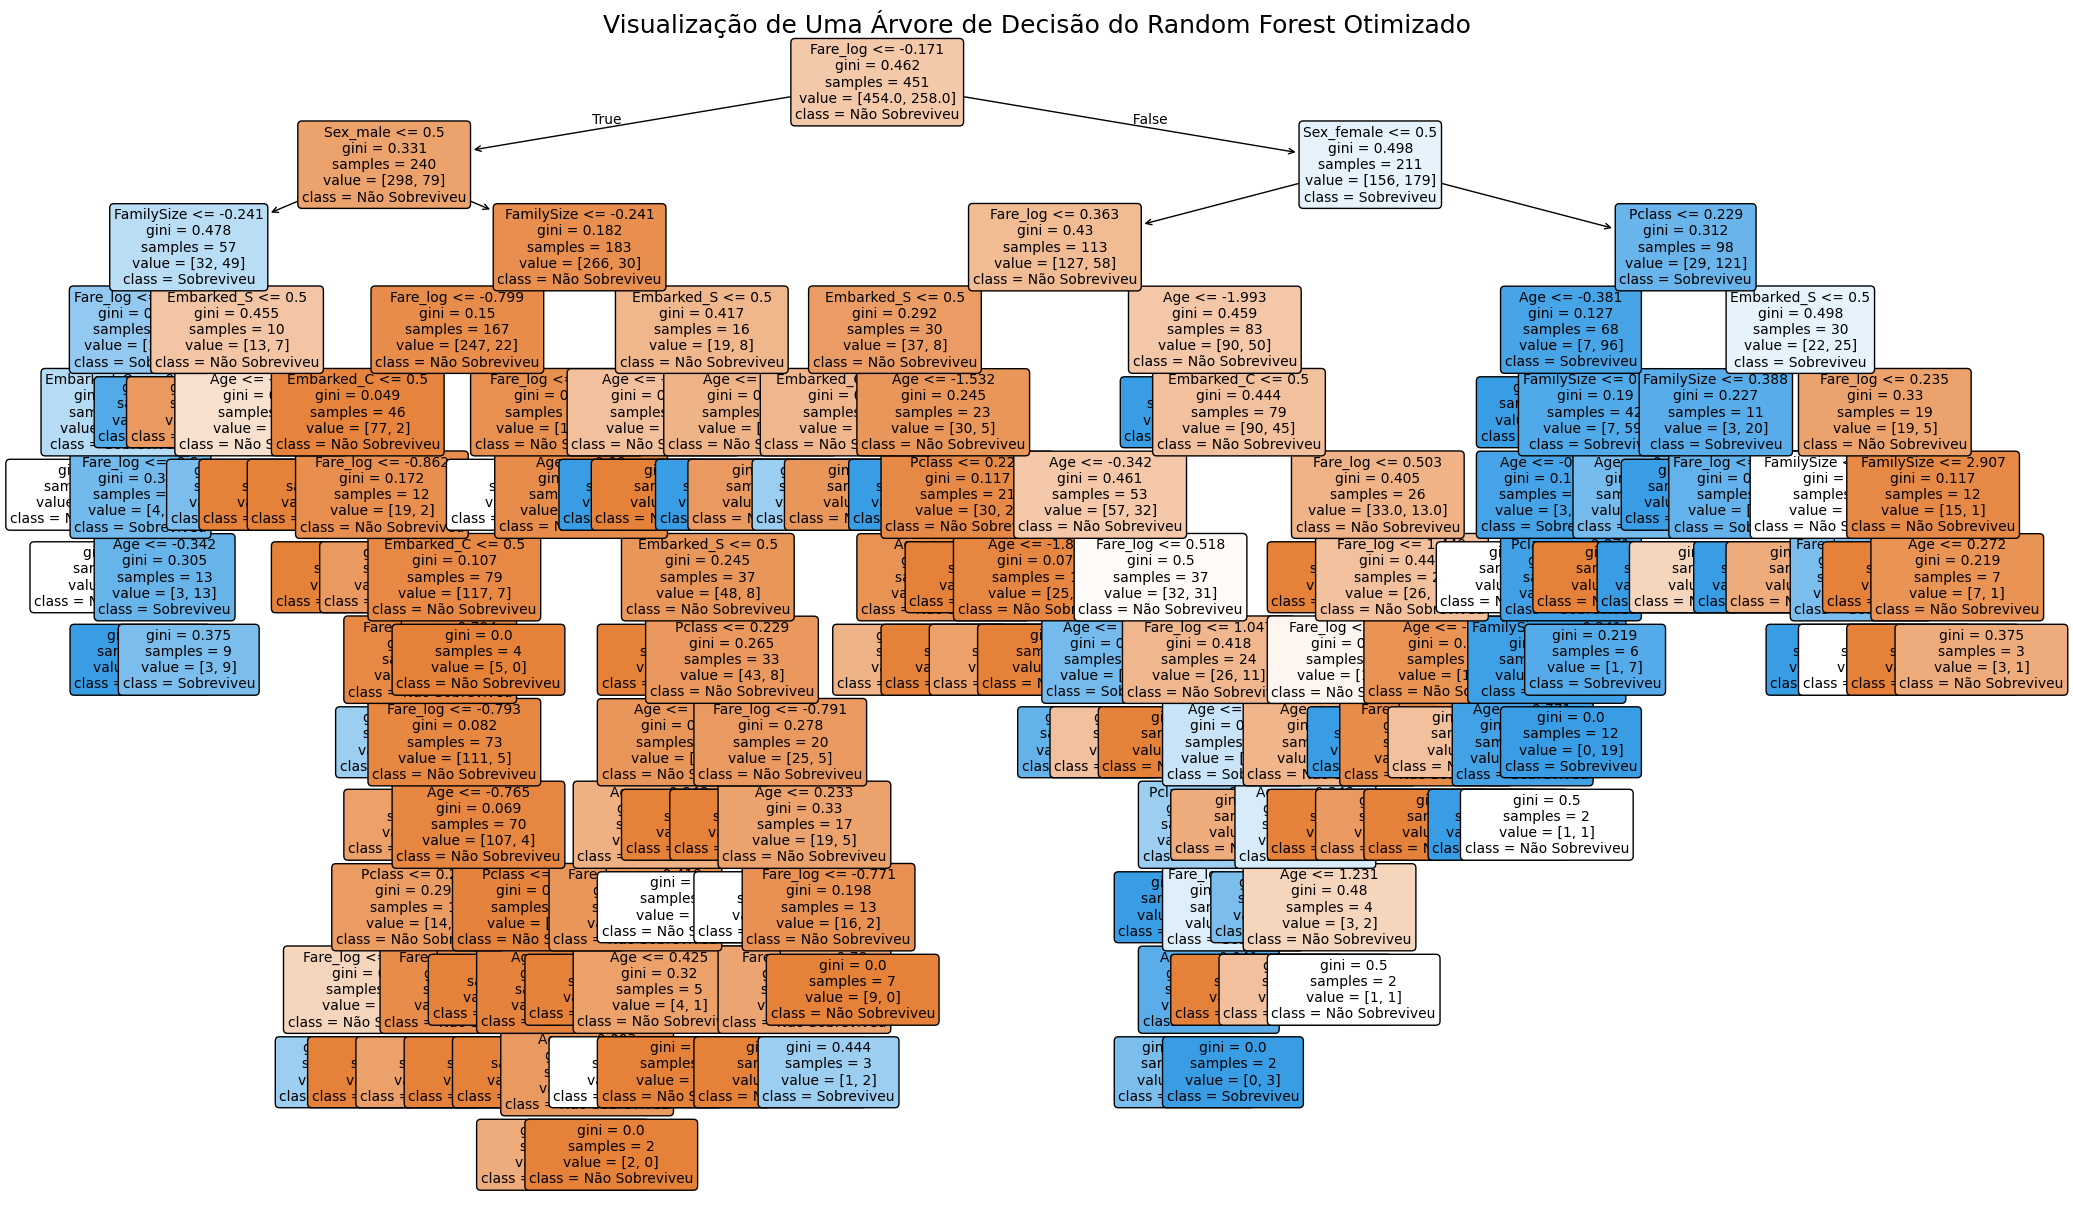


Primeiras 5 linhas de X_train (para referência das colunas):
       Pclass       Age  Fare_log  FamilySize  Sex_female  Sex_male  \
692  0.829568 -0.112078  1.124592   -0.556339       False      True   
481 -0.370945 -0.112078 -3.014278   -0.556339       False      True   
527 -1.571457 -0.112078  2.508198   -0.556339       False      True   
855  0.829568 -0.879807 -0.627019    0.073412        True     False   
801 -0.370945  0.118241  0.361872    0.703162        True     False   

     Embarked_C  Embarked_Q  Embarked_S  
692       False       False        True  
481       False       False        True  
527       False       False        True  
855       False       False        True  
801       False       False        True  


In [59]:
# Plotar uma Árvore de Decisão do Random Forest

plt.figure(figsize=(25, 15)) # Ajuste o tamanho para melhor visualização
plot_tree(best_rf_model.estimators_[0], # Seleciona a primeira árvore da floresta (índice 0)
          feature_names=X_train.columns.tolist(), # Nome das features
          class_names=['Não Sobreviveu', 'Sobreviveu'], # Nomes das classes
          filled=True, # Preencher os nós com cores
          rounded=True, # Cantos arredondados
          fontsize=10) # Tamanho da fonte
plt.title("Visualização de Uma Árvore de Decisão do Random Forest Otimizado", fontsize=18)
plt.show()

print("\nPrimeiras 5 linhas de X_train (para referência das colunas):")
print(X_train.head())

### Machine Learning - Floresta Aleatoria (Random Forest) - Importancia das Features

In [60]:
# Obter a importância das features do melhor modelo
importancia = best_rf_model.feature_importances_

In [61]:
# Mapear as importâncias para os nomes das colunas
feature_nomes = X_train.columns
feature_importancia = pd.Series(importancia, index=feature_nomes).sort_values(ascending=False)

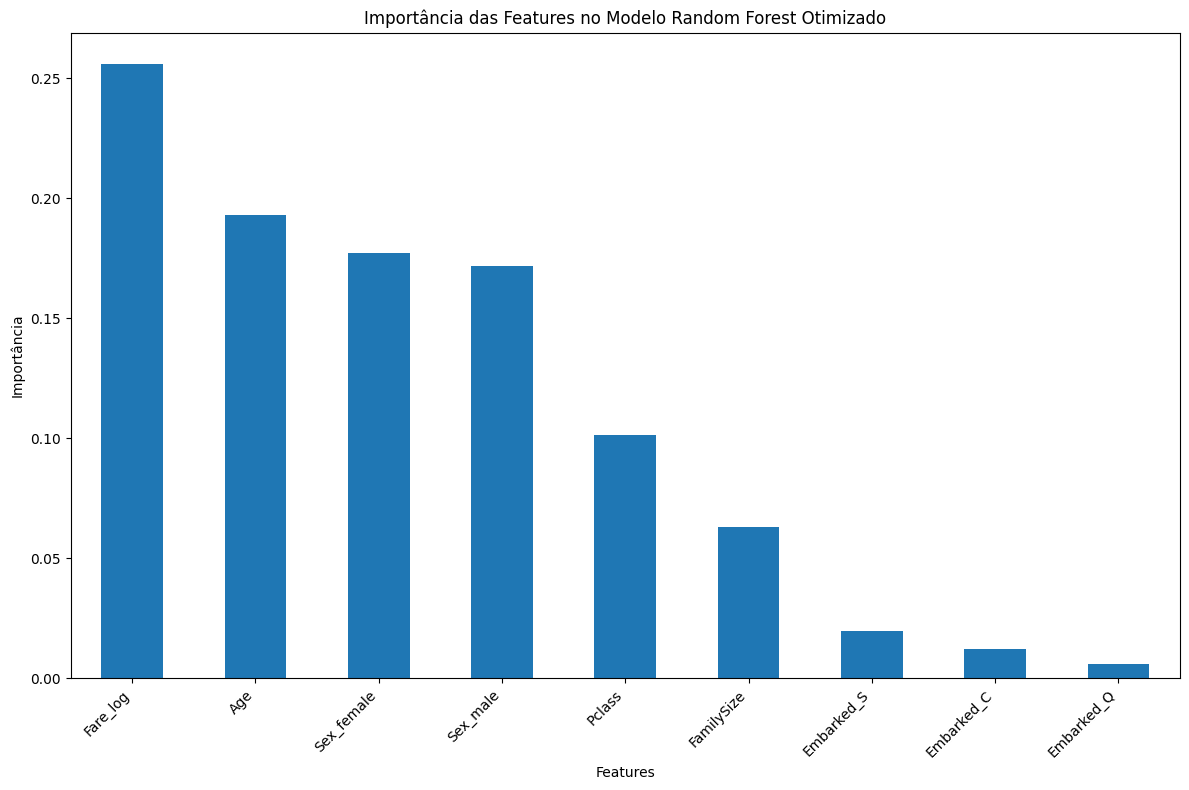


Importância das Features:
Fare_log      0.256061
Age           0.192999
Sex_female    0.177067
Sex_male      0.171768
Pclass        0.101340
FamilySize    0.062958
Embarked_S    0.019616
Embarked_C    0.012344
Embarked_Q    0.005847
dtype: float64


In [62]:
# Plotar a importância das features
plt.figure(figsize=(12, 8))
feature_importancia.plot(kind='bar')
plt.title('Importância das Features no Modelo Random Forest Otimizado')
plt.xlabel('Features')
plt.ylabel('Importância')
plt.xticks(rotation=45, ha='right') # Rotaciona os rótulos do eixo X para melhor leitura
plt.tight_layout() # Ajusta o layout para evitar cortes
plt.show()

print("\nImportância das Features:")
print(feature_importancia)

### Machine Learning - Floresta Aleatoria (Random Forest) - Validacao Cruzada

In [79]:
# Criar uma cópia de X para escalonar, para não modificar o X original que usaremos
X_scaled_para_vc = X.copy()
X_scaled_para_vc[Colunas_Numericas] = scaler.fit_transform(X_scaled_para_vc[Colunas_Numericas])

In [ ]:
# GridSearchCV será treinado no X_scaled_para_vc e y
grid_search_rf.fit(X_scaled_para_vc, Y) # Treinar GridSearchCV no X completo (X_scaled_para_vc) para obter best_estimator_
best_rf_model = grid_search_rf.best_estimator_

In [ ]:
# Realizar Validação Cruzada no melhor modelo ---

# Executar a validação cruzada
# cv=5 significa 5-fold cross-validation
# n_jobs=-1 para usar todos os núcleos da CPU
print("\nRealizando validação cruzada no melhor modelo Random Forest...")
cv_scores = cross_val_score(best_rf_model, 
                            X_scaled_para_vc, 
                            Y, 
                            cv=5, # cv=5 significa 5-fold cross-validation
                            scoring='accuracy', # 'scoring' define a métrica de avaliação
                            n_jobs=-1) # n_jobs=-1 para usar todos os núcleos da CPU

In [ ]:
# Imprimir os resultados
print(f"Pontuações de acurácia da validação cruzada: {cv_scores}")
print(f"Acurácia média da validação cruzada: {cv_scores.mean():.4f}")
print(f"Desvio padrão da acurácia da validação cruzada: {cv_scores.std():.4f}")


Realizando validação cruzada no melhor modelo Random Forest...
Pontuações de acurácia da validação cruzada: [0.82681564 0.80898876 0.88202247 0.80337079 0.84831461]
Acurácia média da validação cruzada: 0.8339
Desvio padrão da acurácia da validação cruzada: 0.0287
